In [2]:
pip install pyfftw

     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     -------- ------------------------------- 0.5/2.6 MB 16.5 MB/s eta 0:00:01
     ------------------------ --------------- 1.6/2.6 MB 16.7 MB/s eta 0:00:01
     ---------------------------------------  2.6/2.6 MB 16.5 MB/s eta 0:00:01
     ---------------------------------------- 2.6/2.6 MB 13.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Note: E2, Frequency: 163.16 Hz


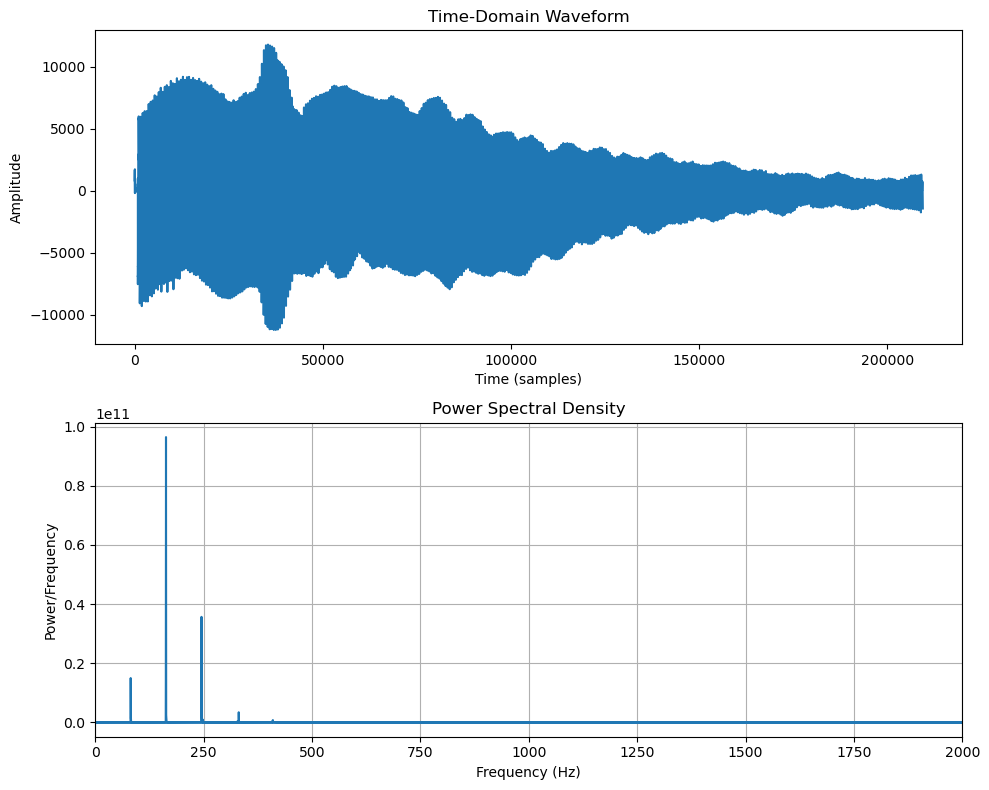

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def frequency_to_note(frequency):
    """
    Convert frequency to the closest musical note.
    """
    A4_freq = 440  # Frequency of A4 (440 Hz)
    note_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    semitone_ratio = 2 ** (1/12)  # Ratio between adjacent semitones

    # Calculate the distance in semitones from A4
    distance_from_A4 = 12 * np.log2(frequency / A4_freq)

    # Round to the nearest integer number of semitones
    semitones = round(distance_from_A4)

    # Map the number of semitones to a note name
    note_index = (semitones + 9) % 12  # Shift by 9 to start at A
    note_name = note_names[note_index]

    # Calculate the octave
    octave = 4 + (semitones // 12)

    return note_name, octave

# Load the WAV file
sample_rate, audio_data = wavfile.read(r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 10\fourier\fourier\guitar.wav")

# Extract the left channel (assuming it's a stereo recording)
#audio_data = audio_data[:, 0]

# Define the length of the audio data (number of samples)
num_samples = len(audio_data)

# Apply windowing (optional)
window = np.hamming(num_samples)
audio_data_windowed = audio_data * window

# Compute the Fourier transform
fourier_transform = np.fft.fft(audio_data_windowed)
freqs = np.fft.fftfreq(num_samples, d=1/sample_rate)

# Find the dominant frequency (fundamental pitch)
dominant_frequency = freqs[np.argmax(np.abs(fourier_transform))]

# Convert the dominant frequency to the closest musical note
note_name, octave = frequency_to_note(abs(dominant_frequency))
note_frequency = abs(dominant_frequency)

print(f"Note: {note_name}{octave}, Frequency: {note_frequency:.2f} Hz")

# Compute the one-sided power spectral density (PSD)
psd = np.abs(fourier_transform) ** 2 / num_samples
psd_one_sided = psd[:num_samples // 2]
freqs_one_sided = freqs[:num_samples // 2]

# Plot the time-domain waveform and the one-sided power spectral density (PSD)
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(audio_data)
plt.title('Time-Domain Waveform')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(freqs, psd)
plt.title('Power Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency')
plt.grid(True)
plt.xlim(0, 2000)  # Adjust x-axis limits for better visibility

plt.tight_layout()
plt.show()


Approximate Note: E2
Frequency of the Note: 163.1578947368421 Hz


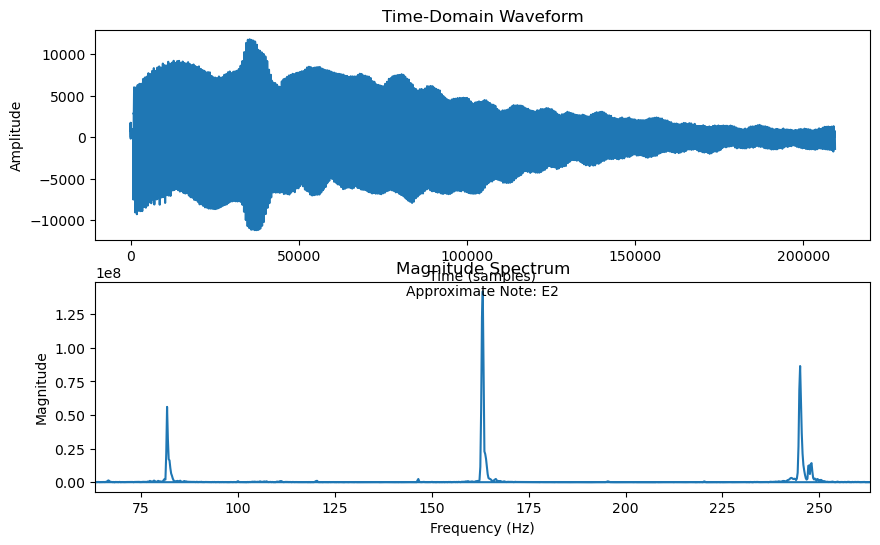

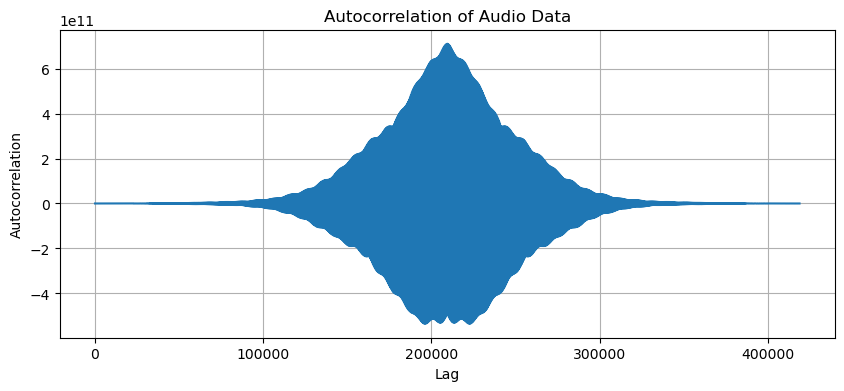

Autocorrelation:
[ -7588.4544     -15343.00163969 -23284.78740083 -31389.5429685
 -39633.25563039 -47955.58627356 -56326.07098554 -64796.39626286
 -73370.17180137 -82097.44570942]


<Figure size 640x480 with 0 Axes>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def frequency_to_note(frequency):
    """
    Convert frequency to the closest musical note.
    """
    A4_freq = 440  # Frequency of A4 (440 Hz)
    note_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    semitone_ratio = 2 ** (1/12)  # Ratio between adjacent semitones

    # Calculate the distance in semitones from A4
    distance_from_A4 = 12 * np.log2(frequency / A4_freq)

    # Round to the nearest integer number of semitones
    semitones = round(distance_from_A4)

    # Map the number of semitones to a note name
    note_index = (semitones + 9) % 12  # Shift by 9 to start at A
    note_name = note_names[note_index]

    # Calculate the octave
    octave = 4 + (semitones // 12)

    return f"{note_name}{octave}", frequency

# Load the WAV file
sample_rate, audio_data = wavfile.read(r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 10\fourier\fourier\guitar.wav")

# Define the length of the audio data (number of samples)
num_samples = len(audio_data)

# Apply windowing (optional)
window = np.hamming(num_samples)
audio_data_windowed = audio_data * window

# Compute the Fourier transform
fourier_transform = np.fft.fft(audio_data_windowed)
freqs = np.fft.fftfreq(num_samples, d=1/sample_rate)

# Find the dominant frequency (fundamental pitch)
dominant_frequency_index = np.argmax(np.abs(fourier_transform))
dominant_frequency = freqs[dominant_frequency_index]

# Convert the dominant frequency to the closest musical note
note, freq_of_note = frequency_to_note(abs(dominant_frequency))

print(f"Approximate Note: {note}")
print(f"Frequency of the Note: {freq_of_note} Hz")

# Plot the time-domain waveform
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(audio_data)
plt.title('Time-Domain Waveform')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

# Plot the Fourier transform (magnitude spectrum)
plt.subplot(2, 1, 2)
plt.plot(freqs, np.abs(fourier_transform))
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# Annotate the plot with the approximate note
plt.text(dominant_frequency, max(np.abs(fourier_transform)), f'Approximate Note: {note}', ha='center', va='center', fontsize=10)

# Zoom in on the frequency range around the dominant frequency
plt.xlim(dominant_frequency - 100, dominant_frequency + 100)

# Calculate the autocorrelation of the audio data
autocorr = np.correlate(audio_data_windowed, audio_data_windowed, mode='full')

# Plot the autocorrelation
plt.figure(figsize=(10, 4))
plt.plot(autocorr)
plt.title('Autocorrelation of Audio Data')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Print the first few values of the autocorrelation
print("Autocorrelation:")
print(autocorr[:10])


plt.tight_layout()
plt.show()


C:\Users\rkesh\AppData\Local\Temp\ipykernel_9908\478076313.py:45: RuntimeWarning: divide by zero encountered in log10
  plt.plot(freqs_one_sided, 10 * np.log10(psd_one_sided))


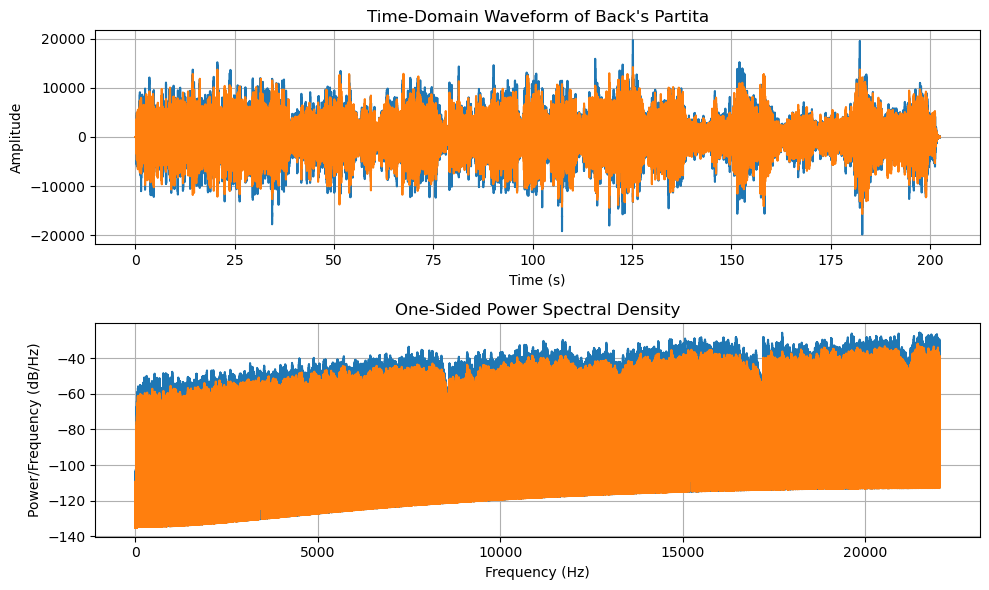

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the WAV file
sample_rate, audio_data = wavfile.read(r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 10\fourier\fourier\BachPartita.wav")

# Define the length of the audio data (number of samples)
num_samples = len(audio_data)

# Define the duration of the audio data in seconds
duration = num_samples / sample_rate

# Generate a time axis for plotting
time_axis = np.linspace(0, duration, num_samples)

# Apply windowing to each channel
window = np.hamming(num_samples)
audio_data_windowed = np.zeros_like(audio_data, dtype=np.float64)
for i in range(audio_data.shape[1]):  # Loop over each channel
    audio_data_windowed[:, i] = audio_data[:, i] * window

# Compute the Fourier transform
fourier_transform = np.fft.fft(audio_data_windowed)
freqs = np.fft.fftfreq(num_samples, d=1/sample_rate)

# Compute the one-sided power spectral density (PSD)
psd = (2 * np.abs(fourier_transform) ** 2) / (sample_rate * num_samples)

# Extract the one-sided PSD and frequencies (discard negative frequencies)
psd_one_sided = psd[:num_samples//2]
freqs_one_sided = freqs[:num_samples//2]

# Plot the time-domain waveform
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time_axis, audio_data)
plt.title("Time-Domain Waveform of Back's Partita")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the one-sided power spectral density (PSD)
plt.subplot(2, 1, 2)
plt.plot(freqs_one_sided, 10 * np.log10(psd_one_sided))
plt.title('One-Sided Power Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)

plt.tight_layout()
plt.show()


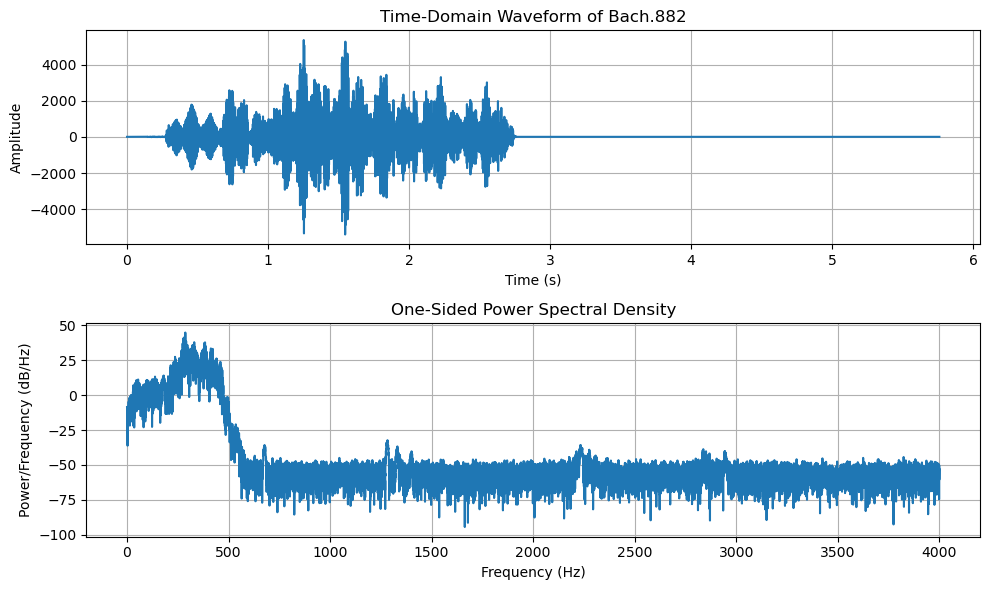

In [14]:
# Load the WAV file
sample_rate, audio_data = wavfile.read(r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 10\fourier\fourier\Bach.882.wav")

# Define the length of the audio data (number of samples)
num_samples = len(audio_data)

# Define the duration of the audio data in seconds
duration = num_samples / sample_rate

# Generate a time axis for plotting
time_axis = np.linspace(0, duration, num_samples)

# Apply windowing
window = np.hamming(num_samples)
audio_data_windowed = audio_data * window

# Compute the Fourier transform
fourier_transform = np.fft.fft(audio_data_windowed)
freqs = np.fft.fftfreq(num_samples, d=1/sample_rate)

# Compute the one-sided power spectral density (PSD)
psd = (2 * np.abs(fourier_transform) ** 2) / (sample_rate * num_samples)

# Extract the one-sided PSD and frequencies (discard negative frequencies)
psd_one_sided = psd[:num_samples//2]
freqs_one_sided = freqs[:num_samples//2]

# Plot the time-domain waveform
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time_axis, audio_data)
plt.title("Time-Domain Waveform of Bach.882")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the one-sided power spectral density (PSD) in dB scale
plt.subplot(2, 1, 2)
plt.plot(freqs_one_sided, 10 * np.log10(psd_one_sided + 1e-10))
plt.title('One-Sided Power Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)

plt.tight_layout()
plt.show()


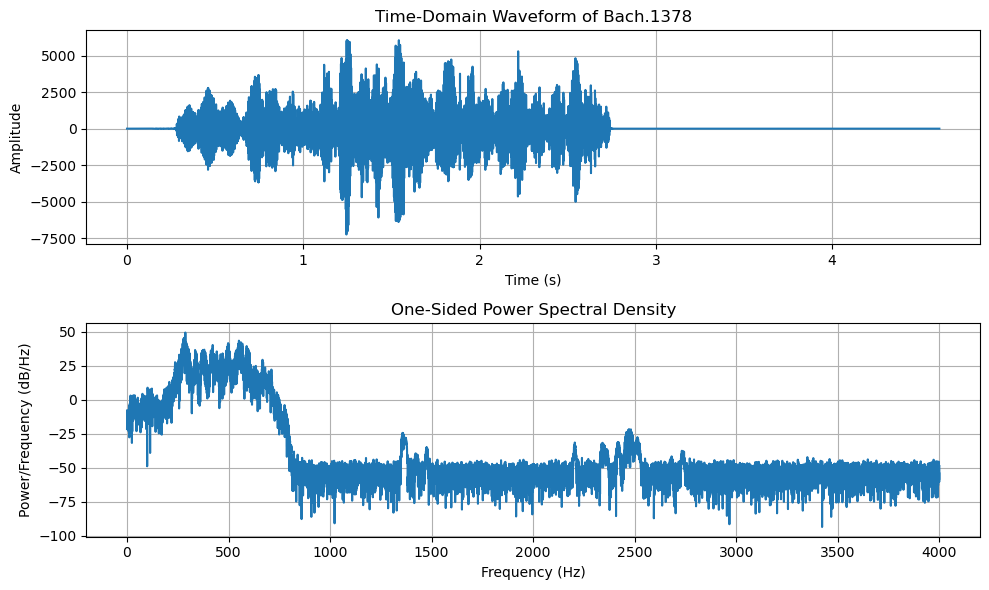

In [15]:
# Load the WAV file
sample_rate, audio_data = wavfile.read(r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 10\fourier\fourier\Bach.1378.wav")

# Define the length of the audio data (number of samples)
num_samples = len(audio_data)

# Define the duration of the audio data in seconds
duration = num_samples / sample_rate

# Generate a time axis for plotting
time_axis = np.linspace(0, duration, num_samples)

# Apply windowing
window = np.hamming(num_samples)
audio_data_windowed = audio_data * window

# Compute the Fourier transform
fourier_transform = np.fft.fft(audio_data_windowed)
freqs = np.fft.fftfreq(num_samples, d=1/sample_rate)

# Compute the one-sided power spectral density (PSD)
psd = (2 * np.abs(fourier_transform) ** 2) / (sample_rate * num_samples)

# Extract the one-sided PSD and frequencies (discard negative frequencies)
psd_one_sided = psd[:num_samples//2]
freqs_one_sided = freqs[:num_samples//2]

# Plot the time-domain waveform
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time_axis, audio_data)
plt.title("Time-Domain Waveform of Bach.1378")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the one-sided power spectral density (PSD) in dB scale
plt.subplot(2, 1, 2)
plt.plot(freqs_one_sided, 10 * np.log10(psd_one_sided + 1e-10))
plt.title('One-Sided Power Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)

plt.tight_layout()
plt.show()


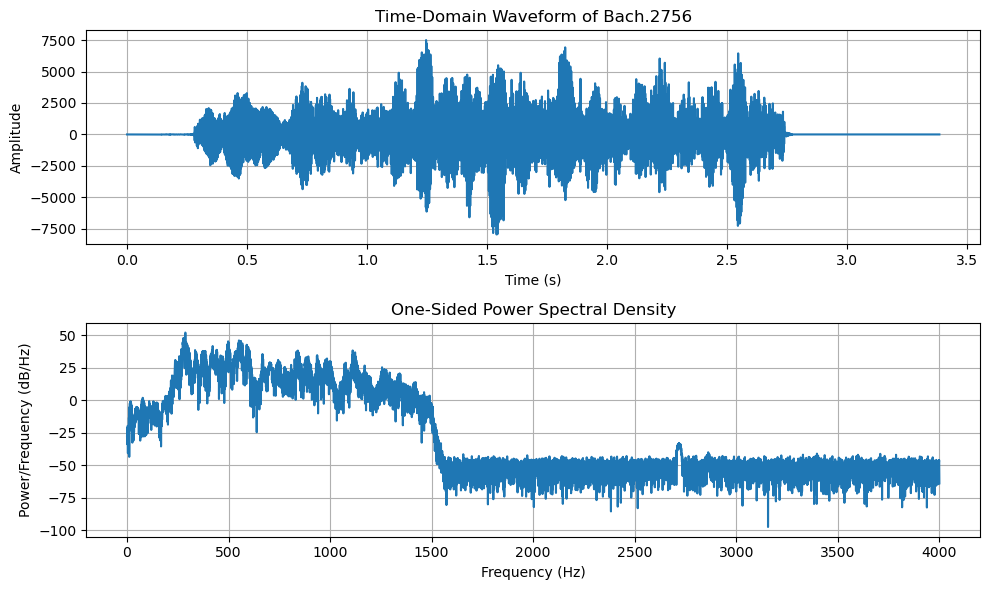

In [16]:
# Load the WAV file
sample_rate, audio_data = wavfile.read(r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 10\fourier\fourier\Bach.2756.wav")

# Define the length of the audio data (number of samples)
num_samples = len(audio_data)

# Define the duration of the audio data in seconds
duration = num_samples / sample_rate

# Generate a time axis for plotting
time_axis = np.linspace(0, duration, num_samples)

# Apply windowing
window = np.hamming(num_samples)
audio_data_windowed = audio_data * window

# Compute the Fourier transform
fourier_transform = np.fft.fft(audio_data_windowed)
freqs = np.fft.fftfreq(num_samples, d=1/sample_rate)

# Compute the one-sided power spectral density (PSD)
psd = (2 * np.abs(fourier_transform) ** 2) / (sample_rate * num_samples)

# Extract the one-sided PSD and frequencies (discard negative frequencies)
psd_one_sided = psd[:num_samples//2]
freqs_one_sided = freqs[:num_samples//2]

# Plot the time-domain waveform
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time_axis, audio_data)
plt.title("Time-Domain Waveform of Bach.2756")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the one-sided power spectral density (PSD) in dB scale
plt.subplot(2, 1, 2)
plt.plot(freqs_one_sided, 10 * np.log10(psd_one_sided + 1e-10))
plt.title('One-Sided Power Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)

plt.tight_layout()
plt.show()


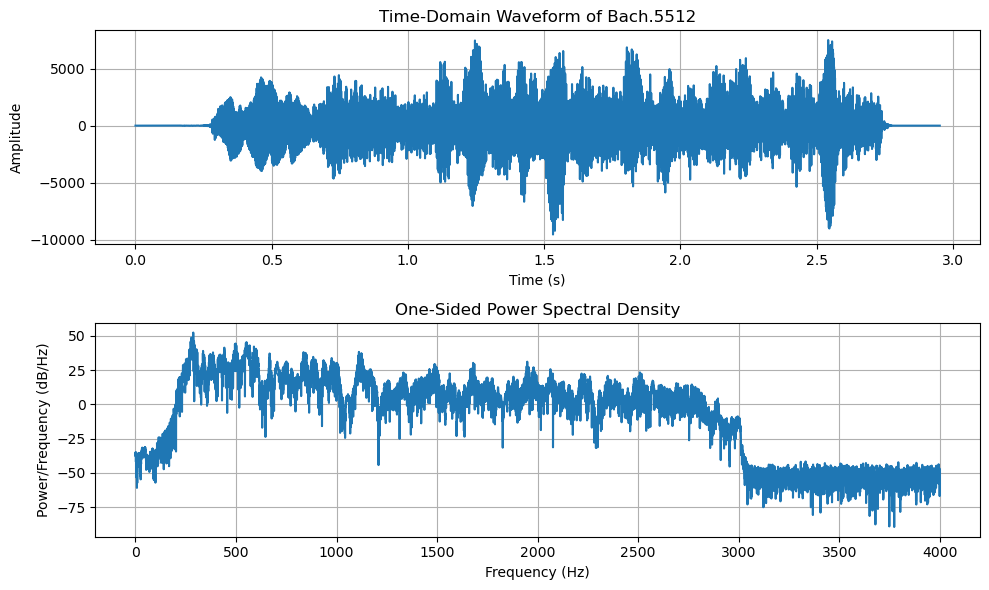

In [17]:
# Load the WAV file
sample_rate, audio_data = wavfile.read(r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 10\fourier\fourier\Bach.5512.wav")

# Define the length of the audio data (number of samples)
num_samples = len(audio_data)

# Define the duration of the audio data in seconds
duration = num_samples / sample_rate

# Generate a time axis for plotting
time_axis = np.linspace(0, duration, num_samples)

# Apply windowing
window = np.hamming(num_samples)
audio_data_windowed = audio_data * window

# Compute the Fourier transform
fourier_transform = np.fft.fft(audio_data_windowed)
freqs = np.fft.fftfreq(num_samples, d=1/sample_rate)

# Compute the one-sided power spectral density (PSD)
psd = (2 * np.abs(fourier_transform) ** 2) / (sample_rate * num_samples)

# Extract the one-sided PSD and frequencies (discard negative frequencies)
psd_one_sided = psd[:num_samples//2]
freqs_one_sided = freqs[:num_samples//2]

# Plot the time-domain waveform
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time_axis, audio_data)
plt.title("Time-Domain Waveform of Bach.5512")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the one-sided power spectral density (PSD) in dB scale
plt.subplot(2, 1, 2)
plt.plot(freqs_one_sided, 10 * np.log10(psd_one_sided + 1e-10))
plt.title('One-Sided Power Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)

plt.tight_layout()
plt.show()


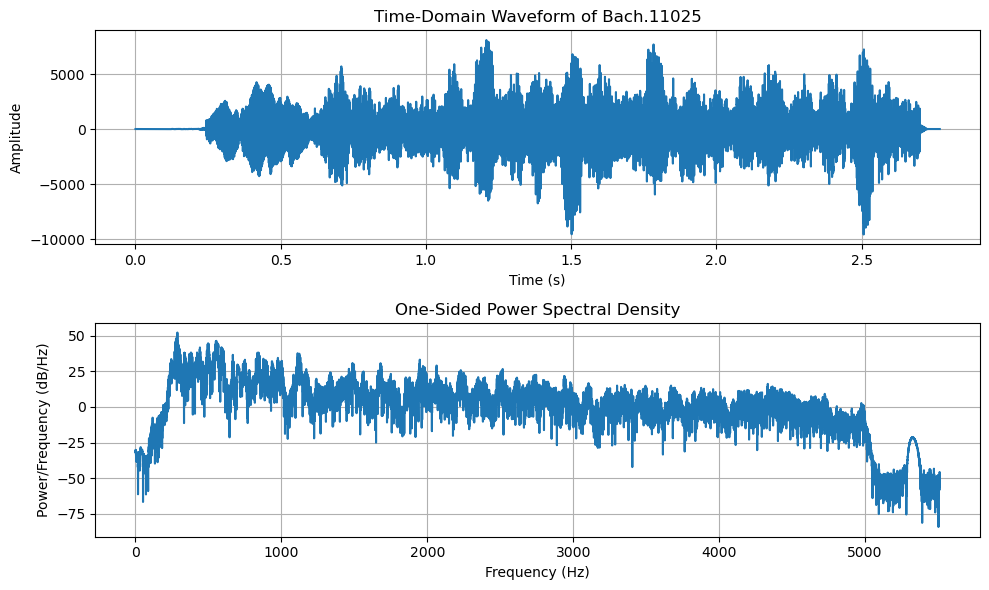

In [18]:
# Load the WAV file
sample_rate, audio_data = wavfile.read(r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 10\fourier\fourier\Bach.11025.wav")

# Define the length of the audio data (number of samples)
num_samples = len(audio_data)

# Define the duration of the audio data in seconds
duration = num_samples / sample_rate

# Generate a time axis for plotting
time_axis = np.linspace(0, duration, num_samples)

# Apply windowing
window = np.hamming(num_samples)
audio_data_windowed = audio_data * window

# Compute the Fourier transform
fourier_transform = np.fft.fft(audio_data_windowed)
freqs = np.fft.fftfreq(num_samples, d=1/sample_rate)

# Compute the one-sided power spectral density (PSD)
psd = (2 * np.abs(fourier_transform) ** 2) / (sample_rate * num_samples)

# Extract the one-sided PSD and frequencies (discard negative frequencies)
psd_one_sided = psd[:num_samples//2]
freqs_one_sided = freqs[:num_samples//2]

# Plot the time-domain waveform
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time_axis, audio_data)
plt.title("Time-Domain Waveform of Bach.11025")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the one-sided power spectral density (PSD) in dB scale
plt.subplot(2, 1, 2)
plt.plot(freqs_one_sided, 10 * np.log10(psd_one_sided + 1e-10))
plt.title('One-Sided Power Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)

plt.tight_layout()
plt.show()


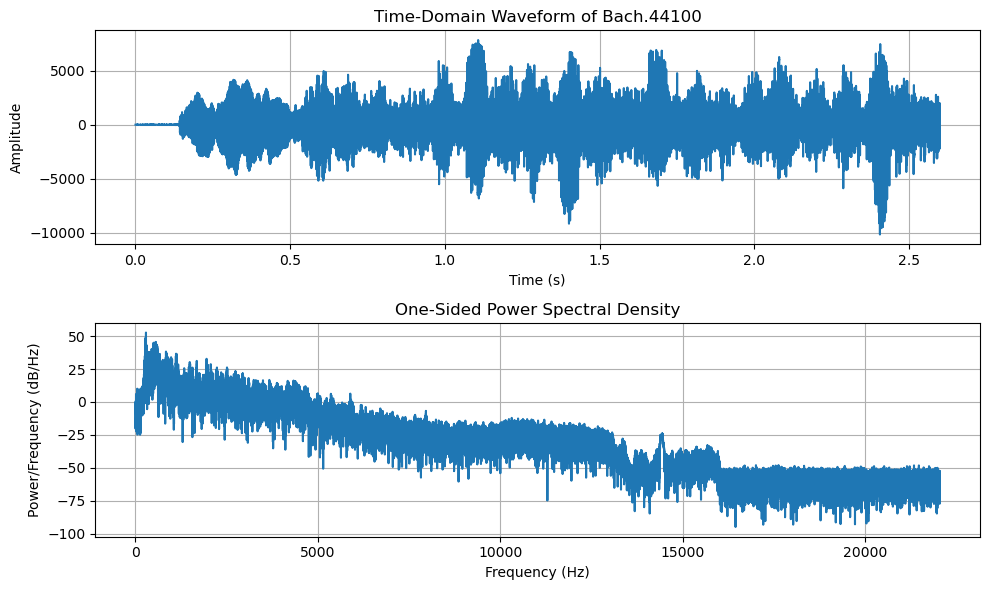

In [19]:
# Load the WAV file
sample_rate, audio_data = wavfile.read(r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 10\fourier\fourier\Bach.44100.wav")

# Define the length of the audio data (number of samples)
num_samples = len(audio_data)

# Define the duration of the audio data in seconds
duration = num_samples / sample_rate

# Generate a time axis for plotting
time_axis = np.linspace(0, duration, num_samples)

# Apply windowing
window = np.hamming(num_samples)
audio_data_windowed = audio_data * window

# Compute the Fourier transform
fourier_transform = np.fft.fft(audio_data_windowed)
freqs = np.fft.fftfreq(num_samples, d=1/sample_rate)

# Compute the one-sided power spectral density (PSD)
psd = (2 * np.abs(fourier_transform) ** 2) / (sample_rate * num_samples)

# Extract the one-sided PSD and frequencies (discard negative frequencies)
psd_one_sided = psd[:num_samples//2]
freqs_one_sided = freqs[:num_samples//2]

# Plot the time-domain waveform
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time_axis, audio_data)
plt.title("Time-Domain Waveform of Bach.44100")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the one-sided power spectral density (PSD) in dB scale
plt.subplot(2, 1, 2)
plt.plot(freqs_one_sided, 10 * np.log10(psd_one_sided + 1e-10))
plt.title('One-Sided Power Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)

plt.tight_layout()
plt.show()


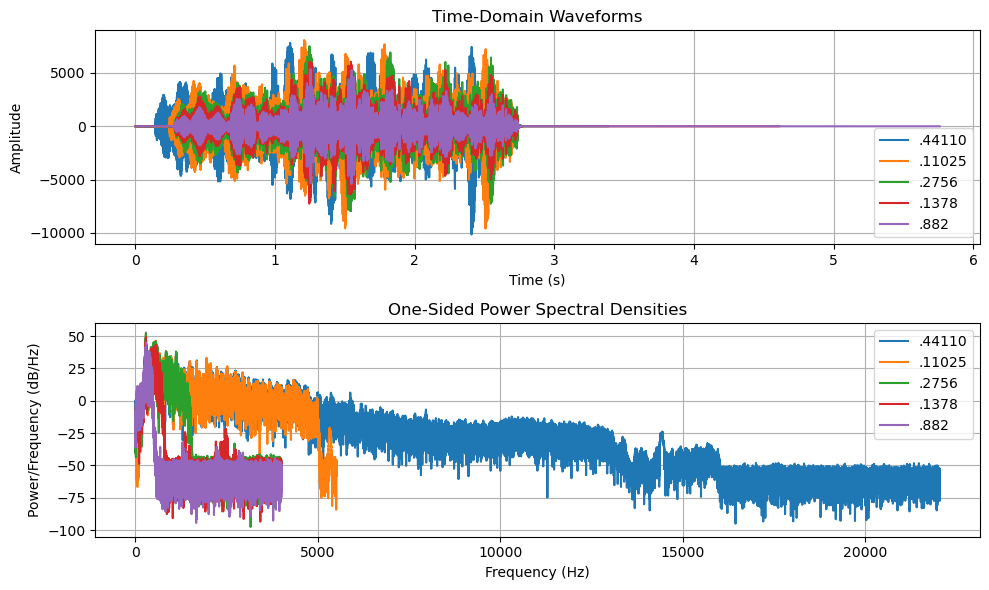

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def plot_audio_spectrum(file_paths, sample_labels):
    plt.figure(figsize=(10, 6))

    for i, file_path in enumerate(file_paths):
        # Load the WAV file
        sample_rate, audio_data = wavfile.read(file_path)

        # Define the length of the audio data (number of samples)
        num_samples = len(audio_data)

        # Define the duration of the audio data in seconds
        duration = num_samples / sample_rate

        # Generate a time axis for plotting
        time_axis = np.linspace(0, duration, num_samples)

        # Apply windowing
        window = np.hamming(num_samples)
        audio_data_windowed = audio_data * window

        # Compute the Fourier transform
        fourier_transform = np.fft.fft(audio_data_windowed)
        freqs = np.fft.fftfreq(num_samples, d=1/sample_rate)

        # Compute the one-sided power spectral density (PSD)
        psd = (2 * np.abs(fourier_transform) ** 2) / (sample_rate * num_samples)

        # Extract the one-sided PSD and frequencies (discard negative frequencies)
        psd_one_sided = psd[:num_samples//2]
        freqs_one_sided = freqs[:num_samples//2]

        # Plot the time-domain waveform
        plt.subplot(2, 1, 1)
        plt.plot(time_axis, audio_data, label=sample_labels[i])

        # Plot the one-sided power spectral density (PSD) in dB scale
        plt.subplot(2, 1, 2)
        plt.plot(freqs_one_sided, 10 * np.log10(psd_one_sided + 1e-10), label=sample_labels[i])

    # Add labels and legend
    plt.subplot(2, 1, 1)
    plt.title("Time-Domain Waveforms")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.title('One-Sided Power Spectral Densities')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (dB/Hz)')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

    
# List of file paths
file_paths = [
    r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 10\fourier\fourier\Bach.44100.wav",
    r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 10\fourier\fourier\Bach.11025.wav",
    r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 10\fourier\fourier\Bach.2756.wav",
    r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 10\fourier\fourier\Bach.1378.wav",
    r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 10\fourier\fourier\Bach.882.wav",
    # Add more file paths as needed
]

# List of labels for the samples
sample_labels = [
    ".44110",
    ".11025",
    ".2756",
    ".1378",
    ".882",
    # Add more labels as needed
]

# Call the function to plot audio waveforms and their spectra
plot_audio_spectrum(file_paths, sample_labels)
